In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('amazon_alexa.tsv',delimiter='\t',quoting=3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.drop(columns=['rating','date'],inplace=True)

In [4]:
df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,Charcoal Fabric,Music,1


In [5]:
# here we can't do OneHotEncoding using Column Transformer as we learnt bcz for that to happen the reamiming columns must be int
# or could be converted into int. Here our verified_reviews wasn't as int yet..Thus we did as below
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
encoded_reviews=enc.fit_transform(df[['variation']])
print(encoded_reviews.toarray())



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
# Thus 0= Black, 1=Black Dot, 2='Black Plus',.....,15=White Spot
print(enc.categories_)

[array(['Black', 'Black  Dot', 'Black  Plus', 'Black  Show', 'Black  Spot',
       'Charcoal Fabric ', 'Configuration: Fire TV Stick',
       'Heather Gray Fabric ', 'Oak Finish ', 'Sandstone Fabric ',
       'Walnut Finish ', 'White', 'White  Dot', 'White  Plus',
       'White  Show', 'White  Spot'], dtype=object)]


In [7]:
print(enc.get_feature_names())

['x0_Black' 'x0_Black  Dot' 'x0_Black  Plus' 'x0_Black  Show'
 'x0_Black  Spot' 'x0_Charcoal Fabric ' 'x0_Configuration: Fire TV Stick'
 'x0_Heather Gray Fabric ' 'x0_Oak Finish ' 'x0_Sandstone Fabric '
 'x0_Walnut Finish ' 'x0_White' 'x0_White  Dot' 'x0_White  Plus'
 'x0_White  Show' 'x0_White  Spot']


In [8]:
column=['Black', 'Black Dot','Black Plus','Black Show','Black Spot','Charcoal Fabric','Configuration: Fire TV Stick',
        'Heather Gray Fabric','Oak Finish','Sandstone Fabric','Walnut Finish', 'White','White Dot','White Plus','White Show','White Spot']
encoded_reviews=pd.DataFrame(encoded_reviews.toarray(),columns=column)
encoded_reviews.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df=pd.concat((encoded_reviews,df),axis=1)
df.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation,verified_reviews,feedback
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Love my Echo!,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Loved it!,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Music,1


In [10]:
df.columns=df.columns.str.strip()

In [11]:
df.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,variation,verified_reviews,feedback
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Love my Echo!,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Loved it!,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charcoal Fabric,Music,1


In [12]:
df.drop(columns='variation',inplace=True)

In [13]:
df.head()


,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,verified_reviews,feedback
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Love my Echo!,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Loved it!,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"""Sometimes while playing a game, you can answe...",1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""I have had a lot of fun with this thing. My 4...",1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Music,1


# Now we'll handle verified_reviews column

In [14]:

df[df['feedback']==0]

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,verified_reviews,feedback
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""It's like Siri, in fact, Siri answers more ac...",0
111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sound is terrible if u want good music too get...,0
141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not much features.,0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Stopped working after 2 weeks ,didn't follow ...",0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sad joke. Worthless.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Echo Dot responds to us when we aren't even ta...,0
3048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The only negative we have on this product is t...,0
3091,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I didn’t order it,0


In [15]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
len(df)

3150

In [18]:
df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       "Sometimes while playing a game, you can answe...
3       "I have had a lot of fun with this thing. My 4...
4                                                   Music
                              ...                        
3145    "Perfect for kids, adults and everyone in betw...
3146    "Listening to music, searching locations, chec...
3147    "I do love these things, i have them running m...
3148    "Only complaint I have is that the sound quali...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [19]:
corpus=[]
for i in range(0,3150):
    review=re.sub('[^a-zA-Z\'\’]',' ',df['verified_reviews'][i])
    review=review.lower()
    review=review.strip()
    #print(review)
    review=review.split()
    #print(review)
    ps=PorterStemmer()
    all_stopwords=stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove("didn't")
    all_stopwords.remove("couldn't")
    all_stopwords.remove("aren't")
    all_stopwords.remove("doesn't")
    all_stopwords.remove("don't")
    all_stopwords.remove("haven't")
    all_stopwords.remove("wouldn't")
    all_stopwords.remove("isn't")
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    #print(review)
    review=' '.join(review)
    print(review)
    corpus.append(review)

love echo
love
sometim play game answer question correctli alexa say got wrong answer like abl turn light away home
lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well
music
receiv echo gift need anoth bluetooth someth play music easili access found smart speaker can’t wait see els
without cellphon cannot use mani featur ipad not see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons not seem smartbon polit yet
think th one i'v purchas i'm work get one everi room hous realli like featur offer specifili play music echo control light throughout hous
look great
love i’v listen song haven’t heard sinc childhood get news weather inform it’ great
sent year old dad talk constantli
love learn knew thing eveyday still figur everyth work far easi use understand make laugh time
purchas mother knee problem give someth tri come not get around fast like enjoy littl big thing alexa play 

love echo
love help use rememb thing sleep ask anyth week still learn
better st gen everi way except one realli miss ring top volum control quicker easier grab top twist without look button find one press time also wish bass bit better great devic i'm happi
love alexa
far like
thoroughli enjoy ecoo love read audiobook offic simpli open audiobook kindl continu elsewher wonder listen music not mood book great set remind much
still love
love
love sound qualiti unit clear sound
listen talk radio morn turn light etc system excel job full hous sound system stream siriu
week still learn alexa learn process love music call time listen podcast radio station start keep shop list groceri list love don’t search paper pencil get time temperatur great not wait weather report sound good not fussi woofer tweeter base etc echo fine afternoon go tri drop son get home go surpris
not much featur
great sound qualiti great featur great product multi room music cool
cool
everyon echo two three bought echo qv

great sound
great
realli use speaker stream music we’v month it’ kinda useless
set user friendli set user friendli i'd hope alexa app abl download pc without instal invas driver wife retir wouldn't abl instal alexa son suppli smart phone wouldn't use alexa yet
easi set realli enjoy
echo doesn’t come built batteri plug time use make quit inconveni
compact bit better origin
love pretti cool
live room music sound realli good live room hear upstair
great product set easi sound wonder
far like bought music though sound pretti good
love
love
glad bought
like type fun music
like volum top turn quickli
beyond capabl program grandkid lve
love new echo give hour music help thing difficult set help tekki
almost good bose love whole hous music
alexa hardli came
easi setup use app also easi instal phone sound qualiti listen music pandora wonder
i’m still learn use echo far love
work awesom
work great
small speaker sound great
great sound size prize cours alexa
don't echo definit need one
great devi

use
worst amazon purchas made big amazon fan love brand unlimit digit music prime video even buy onlin game music movi amazon app tri use make simpl purchas anyth useless
work well microphon pick well full size echo audio qualiti okay size
bought two refurbish one work home work perfectli appear brand new
amazon doesn't disappoint
work great bt receiv output connect vintag stereo equip
work great far can't tell not new edit longev year that' real test
amaz
love everyth
use dot work fine compliment echo
work like new one tell differ new one bough refurbish one
well i’m big fan echo one went i’m bathroom work great expect
purchas year old mother love talk alexa respons detect name room
like new perform brand new one problem
echo dot disconnect speaker time day not buy refurbish product star effort
love great product
work good satisfi
love alexa sound dot not best echo nd gen kitchen live room got bedroom there’ signific differ sound dot lack full base sound sound it’ come cheap portabl s

love echo purchas compani husband alexa great say name tell joke play favorit song

love abl listen music easili still learn featur avail
realli know could use devic use thing need overview
love wish built hub
use primarili play music work wonder still get use mani thing amazon sent sever tip sinc got thank help
easi set
fast respons amaz clear concis answer sound qualiti fantast still get use alexia not usd echo full extent
you’r need na na nana
everyth expect
love echo work like said would don't smart home cannot speak function everyth els good
great sound small packag easi set use fun
work sound great
sound amaz mani collect music
set
doesn’t alway listen
it’ awesom
bought control fio televis work well i’m hope time control fio discov thing alexa play music ask great sound alexa play game play radio station play old time radio program like long ranger alexa mani app add abil day play madlib great fun also alexa control household applianc purchas alexa compat power strip control ligh

pleasantli surpris sound qualiti echo big fan deep bass might not suffici though potenti control home option explor evolv home smart home voic recognit impress stylish fun regret purchas great technic chang peopl ask play song movi respond instantli elderli love one would great gift connect wifi simpl use want unlimit music control sure amazon prime premium spotifi blown away person dj even convers echo not embarrass say echo made laugh coupl time ask tell joke tell packag sinc amazon prime addict come extrem handi
easi setup love thing
alexa throughout hous futur arriv
alreadi alexa amazon find today could not resist get echo also best thing ever use side hous couldn't happier
arriv expect
bought week ago everyth product excel don't forget buy charger order must take outsid pool not worri hire electrician put outlet yard
terrif
love echo
it’ smaller origin look nicer
work great
husband would call late adopt come technolog decid would tri echo serv primarili music sourc wow amaz great 

nice upgrad echo dot
work decent wish abl answer question need better sourc info rest work great
can't live without alexa
realli like screen major plu
didnt think id get alexa devic perfect home offic screen add littl piec make worth extra cost alexa devic show lyric song play xm radio show video movi trailer news great
love made group echo dot get music home wait go sale hope get anoth spot bedroom love alarm weather sound voic
first receiv product great howev week ago devic serv video advertis around pm night scare famili want make sure protect don't allow video directli home spot not devic keep safe
fun use make life easier sens
love


got echo spot prime day love think still littl expens chanc save convinc buy basic use radio alarm clock old radio station would sometim not come clearli also like sleep sound skill hear weather i'm still explor skill discov star trek sound alexa beam fun
love replac old alarm clock bedroom love dim night respons command
love spot even expect great si

product look ador room love recent bought mom one gift prime day can't wait use
love spot
love way googl home devic i'v use coupl month amazon prime subscrib valu greater googl i'm use listen free music prime better altern audibl even watch movi display littl small lot watch sound louder youtub need avail issu put star fix one youtub star item allevi sound i'v pair blue tooth speaker right sit live area think shine offic desk great offer could see purchas addit nightstand amazon alexa item household felt happi ad hous felt stupid use googl home
like alexa devic small
wonder littl alexa enabl gadget like analog clock face best
love love love bought prime day buyer remors got love first sight
like echo spot fit decor also sing along favorit song
best bedsid clock assist ever
omg start love thing none bad say
work describ
get rid thong tri screen numb nut
not use yet i'm sure great other not get amaz echo echo dot greatest technolog ever came
excit happi breez set favorit featur read kind

use fun great play music turn light know els
work great seem delay bring ring camera sound video qualiti good
work great use arlo secur system
fun realli enjoy use hook one light tell alexa want also connect spotifi alexa resum playlist pick right end feel like there' even i'm excit use
upgrad origin echo prime day far love i'm sure long way go maxim util owe mark increas lyric knowledg thing knew post malon actual use word
can't access youtub consumer' pay argument can't good product offer need

still learn echo show far love year old love cook especi aunt live state connect cook togeth
love desk fact video friend listen music word right see amazon cloud cam feed one locat pretti spectacular got one sale stellar think need anoth one front room
love
love echo show great sound pictur great job thing entir echo collect
can’t chang voic echo
everyth could ask great product
like clear screen hi resolut
easi use everyth hope
love echo show i’m go live campu school fall got two serv easi way

love size video good qualiti sound awesom
home
bought older grandpar help remind would recommend anyon someon life dementia memori loss help grandmoth rememb take medic daili task love listen music ask question
kid like game show lyric song neat
need abl connect rd parti viceo app
glad upgrad aka
still lean price right
two dot tap show love echo show sound qualiti amaz compar dot use mine constantli creat shop list kitchen laundri timer news updat throughout hous play music throughout use group set
absolut love show
echo show white nbsp great new addit alexa home solut call back home video chat directli phone great way stay touch famili
echo screen henc still need work consid googl home
great product
like fact messag visual well audibl puzzl light make quot notif quot sound ask alexa read notif tell new notif happen least day week
love alexa whole new level love fun watch movi trailer weather much complet listen music lyric appear still discov echo show highli recommend take alexa comp

sound better
convers anoth person instantan respons fact catch command even far simpli amaz
although haven't taken advantag mani echo' featur one bother start talk even haven't said anyth even close wake word echo chang alexa due conflict anoth devic
echo plu straight forward easi use play great sound music lot thing still learn work well far
use last week like children also like alexa becom part famili
terribl stop work one day
better sound echo dot simpl set less minut
nice toy around
not speak spanish bought grandmoth someon talk i’m not around spanish
love cool thing
great product
like still work discoveri realli soon fulli evalu look forward learn use
got echo excit devic better sound dot hub control hue bulb didn't realiz also fulli commun can't use hue bulb full potenti devic turn light set number preset color also cannot updat bulb newest firmar secur concern not buy want full featur hub new iot devic end need updat standalon hub make hub insid devic redund pointless still love

enjoy much
like it’ voic activ don’t link bluetooth devic alexa devic
appear work fine first echo stop repli request receiv echo plu happi problem hassel exchang
best amazon speaker alexa you’r think it’ good smart hub you’r wrong connect smart light devic tell alexa turn that’ you’r better buy separ hub control devic
still tri link son' daughter' room

didn’t realli work smooth make seem like
everyth offer
love
besid fun also mani practic aspect real bonu vision issu
work perfect
alexa us funni enjoy nice sound
echo plu built hub black amazon
good product like thank
louder dot got built hub wireless control hous
easi set
debat star review one challeng hub phillip ad function work hub basic function work unit need two app set everyth want instead one caus user issu woken coupl time without trigger word find highli unsettl minor issu not alway pick say correctli usual one two repeat happen speaker great qualiti easili cover kitchen live room sleek design not obtrus girlfriend fun intera

great product
work great lag much better gen devic use would recommend rst gen tire lag crash
work great easi set
love easi use
love firestick easi set use rare stop buffer would bargain twice price
like fire stick i’m close cut cabl find mani movi show keep budget check i’m learn maneuv around channel find show quickli
simpl instal love voic activ
haven’t use much yet like use husband love
easi set easi use
connect brought mani option view connect quit channel must
great product bit problem download kodi done get movi tv program
impress simpl use
perfect stream show ditch cabl love
best stream devic market
great product love larger remot great deal
thing awesom watch regular cabl go black friday christma gift
love option fire tv stick work great
menu'' cumbersom get app set
easi use
awesom
good shape
i’m unhappi firestick everi time chang program channel within program long delay roku’ work fine quick
return hulu not work devic kept come error hulu app not abl open time hit miss time 

love
best purchas year
love dot one echo medium size room loud enough without extern speaker although use extern dot
realli love dot awesom it’ connect room like you’v read review definit lower volum i’m sure connect speaker anoth devic would great stand alon volum ok definit not like tall echo dot don’t pick voic good tall echo still total love would recommend
okay keep drop wifi
kid love love

love echo dot easi use set
love echo
excel product
love abl control light door music
fun interact
satisfi product
echo even one barn great idea work hors still get news flash music
bought heal room play continu spa like music although alexa know type music need devic not deliv qualiti sound sound muffl didn't know buy speaker
like music ever
hard hear blue tooth better speaker
problem work expect could better speaker
love want get anoth one soon
great along echo
nd echo dot work want bedroom par small blue tooth speaker last nite went sleep sound thunderstorm provid echo dot plan dot turn bedro

love technolog i'm older easi set use dot bedroom use everyth use echo live room
use rd dot bought husband would abl contact someon fall doesn't access phone
amaz product still learnimg thing
expect
product sound emoji speaker five sister even one bluetooth doesn’t need plug good thing speak
friend
it’ easier thing
good devic
overal love command aren't effect may part user error alexa becom accustom ask
addit alexa base devic make access better part home rather tri shout question instruct hous lol wouldn't without alexa varieti function perform
work great love fact play music group devic
love thought would i'm addict
work beauti excel sound
still learn everyth good room volum pretti good without addit speaker
neat tool enjoy famili
easi connect skill creat echo nd gen work fine dot
live alon best companion
easi set connect smart devic need
love person prefer spotifi music it’ great abl set default there’ not day goe without music home also reason got keep pup calm leav tell alexa play 

love watch wife argu alexa woke one night listen alexa talk cell phone


gave gift love
echo dot everyth expect
love super conveni make life littl easier
love echo dot mani featur work great thing don't like can't play imus i'm go pay spotifi amazon music account
great lot fun
easi setup alexa need lot train
third echo dot purchas love product
like compact structur dot sound littl low
handi don't expect much much dumber assist phone
easi set use new featur skill ad time
love product dislik can’t sync appl music alexa play
one week far say blast
love
work like charm
good speaker bedroom offic
small speaker tin sound great good bluetooth speaker
fun inform dislik far like conveni
easi set afford love
love shut microphon night children can’t talk bed time automat sleep timer lullabi music not sure surviv long
echo dot relat devic best thing come long time
sound qualiti wasn’t great inexpens
work great bought shop like intercom hous
isn’t bad issu actual play want get use iheartradio prope

est producto lleg la semana se qu sin olor perdi toda su escencia huel solo alcohol
easi set readi use minut
barri

three year old love good basic household task we'r go add smart outlet bulb
awesom devic wish bought one age ago
love
perfect kid adult everyon
listen music search locat check time look weather mani task learn simpl set
love thing run entir home tv light thermostat front door dead bolt camera love listen npr thing well worth valu realli shine stat ad smart devic control entir home like right star trek name mine comput get feel amaz devic smart system
complaint sound qualiti isn't great mostli use command though anoth dot hook stereo system play music coupl friend dot don't mind audio qualiti bother kind thing i'd go full size echo make sure hook larger speaker
good


In [20]:
print(corpus)
    

['love echo', 'love', 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home', 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well', 'music', 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker can’t wait see els', 'without cellphon cannot use mani featur ipad not see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons not seem smartbon polit yet', "think th one i'v purchas i'm work get one everi room hous realli like featur offer specifili play music echo control light throughout hous", 'look great', 'love i’v listen song haven’t heard sinc childhood get news weather inform it’ great', 'sent year old dad talk constantli', 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time', 'purchas mother knee problem give someth tri come not get around fast 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
df_vectorizer=cv.fit_transform(corpus).toarray()

In [22]:
print(df_vectorizer)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
df_vectorizer.shape

(3150, 2801)

In [24]:
print(cv.get_feature_names())

['abay', 'abc', 'abd', 'abil', 'abl', 'abod', 'absolut', 'absolutli', 'ac', 'accent', 'accept', 'access', 'accessori', 'accesss', 'accid', 'accident', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accustom', 'acknowledg', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addon', 'address', 'adept', 'adequ', 'adjac', 'adjust', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'aesthet', 'af', 'affirm', 'afford', 'afraid', 'afternoon', 'afterward', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ai', 'aid', 'aint', 'air', 'aka', 'al', 'alabama', 'alarm', 'albeit', 'alcohol', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'alexu', 'algo', 'aliv', 'allevi', 'allow', 'allrecip', 'almost', 'alon', 'along', 'alongsid', 'alot', 'aloud', 'alread', 'alreadi', 'alright', 'also', 'alter', 'altern', 'although', 'alway', 'amaonmaz', 'amax', 'amaz', 'amazin', 'amazingli', 'a

In [25]:
encoded_reviews=pd.DataFrame(df_vectorizer)
print(encoded_reviews)

      0     1     2     3     4     5     6     7     8     9     ...  2791  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     1     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3145     0     0     0     0     0     0     0     0     0     0  ...     0   
3146     0     0     0     0     0     0     0     0     0     0  ...     0   
3147     0     0     0     0     0     0     0     0     0     0  ...     0   
3148     0     0     0     0     0     0     0     0     0     0  ...     0   
3149     0     0     0     0     0     0     0     0     0     0  ...     0   

      2792  2793  2794  2795  2796  2797  2798  279

In [26]:
df=pd.concat((df,encoded_reviews),axis=1)
df.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.drop(columns='verified_reviews',inplace=True)

In [29]:
df

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [31]:
y=df['feedback']

In [35]:
x=df.drop(columns='feedback')

In [37]:
x.shape

(3150, 2817)

In [38]:
y.shape

(3150,)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [50]:
x_train.iloc[:,16]

2859    0
793     0
2875    0
2034    0
493     0
       ..
763     0
835     0
1653    0
2607    0
2732    0
Name: 0, Length: 2520, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.iloc[:,16:]=sc.fit_transform(x_train.iloc[:,16:])
x_test.iloc[:,16:]=sc.transform(x_test.iloc[:,16:])

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
x_train

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
2859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
793,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
2875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
2034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
835,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
1653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924
2607,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.019924,-0.090462,-0.019924,-0.039873,-0.019924,-0.034524,-0.037673,-0.019924,-0.019924,-0.019924


In [53]:
from  sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
y_predict=classifier.predict(x_test)

In [55]:
y_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
# Much better accuracy than the normal method as seen in lec..it had 54 incorrect predictions at this point..we had only 45
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_predict)
print(cm)
print(accuracy_score(y_test,y_predict))

[[ 16  38]
 [  7 569]]
0.9285714285714286


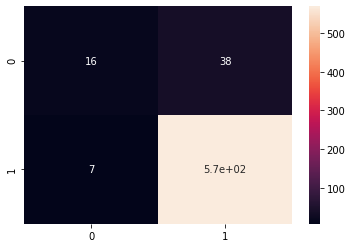

In [57]:
sns.heatmap(cm,annot=True)

In [58]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.30      0.42        54
           1       0.94      0.99      0.96       576

    accuracy                           0.93       630
   macro avg       0.82      0.64      0.69       630
weighted avg       0.92      0.93      0.92       630



In [59]:
#lets apply k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print('Accuracy is: {:.2f} %'.format(accuracies.mean()*100))
print('StDev is: {:.2f} %'.format(accuracies.std()*100))

Accuracy is: 93.53 %
StDev is: 0.87 %


In [60]:
#applying grid search
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[100,150,200,250,300],'criterion':['gini','entropy']}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print('Best Accuracy is: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters are:',best_parameters)


Best Accuracy is: 93.61 %
Best Parameters are: {'criterion': 'gini', 'n_estimators': 150}


# Let's try to improve our model

In [61]:
df=pd.read_csv('amazon_alexa.tsv',delimiter='\t',quoting=3)
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [62]:
df.drop(columns=['rating','date','variation'],inplace=True)

In [63]:
df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


In [64]:
df['Length of reviews']=df['verified_reviews'].apply(len)

In [65]:
df.head()

,verified_reviews,feedback,Length of reviews
0,Love my Echo!,1,13
1,Loved it!,1,9
2,"""Sometimes while playing a game, you can answe...",1,197
3,"""I have had a lot of fun with this thing. My 4...",1,174
4,Music,1,5


In [66]:
df.drop(columns='verified_reviews',inplace=True)
df.head()

,feedback,Length of reviews
0,1,13
1,1,9
2,1,197
3,1,174
4,1,5


In [67]:
df=pd.concat((df,encoded_reviews),axis=1)
df.head()

,feedback,Length of reviews,0,1,2,3,4,5,6,7,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
0,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,197,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,174,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [69]:
x.head()

,Length of reviews,0,1,2,3,4,5,6,7,8,...,2791,2792,2793,2794,2795,2796,2797,2798,2799,2800
0,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,197,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,174,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [73]:
x_train

array([[-0.57955941, -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443],
       [-0.65806658, -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443],
       [-0.5743256 , -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443],
       ...,
       [-0.19749121, -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443],
       [ 0.64515236, -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443],
       [-0.69470326, -0.01992443,  0.        , ..., -0.01992443,
        -0.01992443, -0.01992443]])

In [74]:
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_predict=classifier.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_predict)
print(cm)
print(accuracy_score(y_test,y_predict))

[[ 15  39]
 [  1 575]]
0.9365079365079365


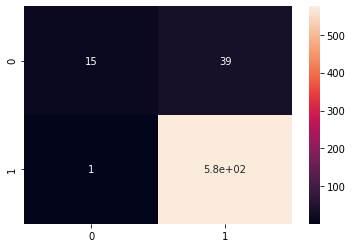

In [77]:
# Thus our accuracy increased from 45 incorrect predictions to 40 now. This is also better than the normal method as that of lec
# because it had 43 incorrect predictions after improving the model.
sns.heatmap(cm,annot=True)

In [78]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.28      0.43        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.94      0.64      0.70       630
weighted avg       0.94      0.94      0.92       630



In [79]:
#lets apply k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print('Accuracy is: {:.2f} %'.format(accuracies.mean()*100))
print('StDev is: {:.2f} %'.format(accuracies.std()*100))

Accuracy is: 93.65 %
StDev is: 0.56 %


In [80]:
#applying grid search
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[100,150,200,250,300],'criterion':['gini','entropy']}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print('Best Accuracy is: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters are:',best_parameters)


Best Accuracy is: 93.81 %
Best Parameters are: {'criterion': 'gini', 'n_estimators': 150}
